# Modeling for Capstone Two: Music & Happiness

### Table of Contents

* [Introduction](#start)
    * [Goal](#goal)
    * [Import relevant libraries](#import)
    * [Load variables from pre-processing \& training phase](#load)
* [Modeling with Linear Regression](#linear-regression)
* [Modeling with Random Forest Regression](#random-forest)

## 1 - Introduction <a name="start"></a>

### 1.1 Goal <a name="goal"></a>
Previously, we explored Spotify user metrics from 71 countries and their potential relationships to measures from the 2023 World Happiness Report. Our goal is to determine whether any of these metrics - or perhaps a combination of them - effectively predict how a country might score on the ladder score of the World Happiness Report. 

#### About the Ladder Score
As previously mentioned in our exploratory data analysis section, the "ladder score" is the "national average response to the question of life evaluations." This is how each survey respondent answered the question, "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?" (This definition comes directly from the statistical appendix of the 2023 World Happiness Report (WHR), which can be found on the official [World Happiness Report website](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf).)

### 1.2 Import relevant libraries <a name="import"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1.3 Load variables from pre-processing and training phase <a name="load"></a>
Previously, we split and trained our data in preparation for creating our model. We stored these variables as `X_train`, `X_test`, `y_train`, and `y_test`. We will retrieve them here:

In [2]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

## 2 - Modeling with Linear Regression <a name="linear-regression"></a>

### 2.1 Training and fitting

In [9]:
# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model using MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Linear Regression Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

Linear Regression Results:
MAE: 0.38993954856527535
MSE: 0.23537241793991873
R-squared: 0.6458859221793622


#### Interpretation of results
The $R^2$ coefficient, also known as the "coefficient of determination," is a measure of how successfully our model predicts our data's variation from the mean. A score of $1.0$ would indicate a perfect model that explains 100% of the variation.

Currently, with an $R^2$ value of 0.6459, our model explains only about 65% of the variation from the mean.

### 2.2 Residual analysis

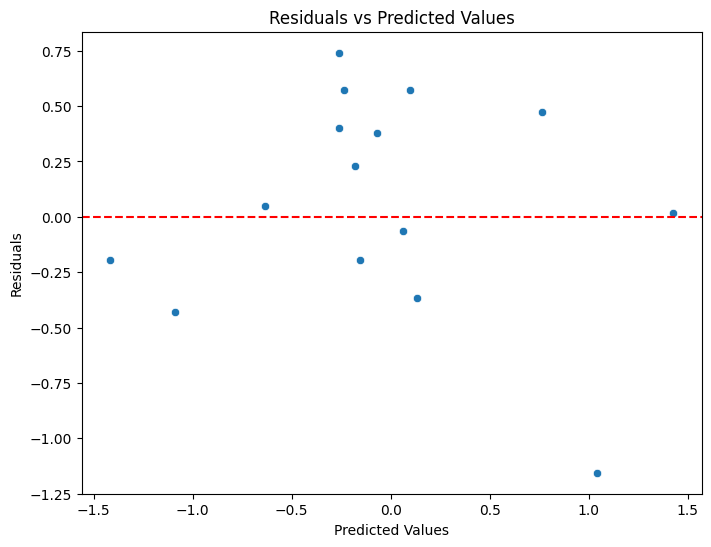

In [4]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

### 2.3 Scatterplot of predictions vs. actual values

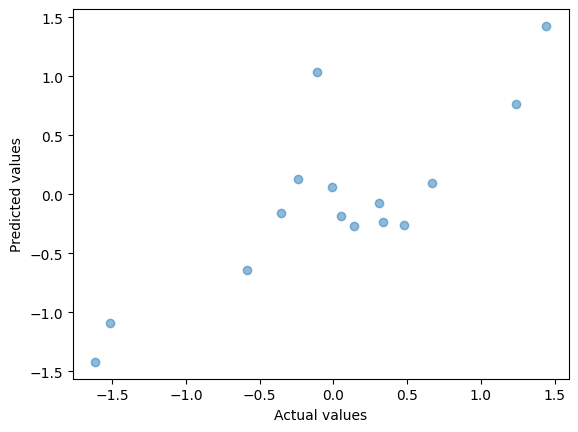

In [5]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## 3 - Modeling with Random Forest Regression <a name="random-forest"></a>

### 3.1 Training and fitting

In [8]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model using MAE, MSE, and R-squared
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the results
print(f"Random Forest Regression Results:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R-squared: {r2_rf}")

Random Forest Regression Results:
MAE: 0.5422061696382587
MSE: 0.40637031650419225
R-squared: 0.38862228997751536
